## Bernoulli's Equation 

$$ y' + p(x)y = g(x)y^n$$ 

Differential Equations in this form are called the Bernoulli Equation. Here $p(x)$ and $g(x)$ are continuous function on the interval and that n is not equal to 0 or 1. This is the equation is used to model phenomena found in fluids and economics 

The Bernoulli Equation is an example of a nonlinear differential equation with a known solution. In this notebook we will work through a method to solve the Bernoulli Equation using the finite difference method. We do this by first linearizing the equation to a form that we can then input onto a computer. 

Just in case you need a refresher: https://tutorial.math.lamar.edu/classes/de/bernoulli.aspx


In [52]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [53]:
np.set_printoptions(threshold=np.inf)

#### Solow Growth Model Brenouilli Equation

$$ \frac{dk}{dt}  = sk(t)^{\alpha} - (\gamma + n + \delta) k(t)$$

$$ \frac{dk}{dt} + (\gamma + n + \delta) k(t) = sk(t)^{\alpha} $$

$$ k' + p(x)k = g(x)k^{\alpha} $$
with $p(x) = (\gamma + n + \delta)$, and $g(x) = s$

In [61]:
alpha = 1/3
n = 0.02
gamma = 0.03
delta = 0.1
s = 0.2
delta_t = 1

Linearize Bernouilli Equation

$$ k^{-\alpha} k' + (\gamma + n + \delta) k^{1-\alpha} = s $$

$$ u = k^{1-\alpha} $$
$$ u = (1-\alpha)k'k^{-\alpha} $$

This becomes:

$$ \frac{u'}{1-\alpha} + (\gamma + n + \delta) u = s$$

We can replace $u'$ to a discritized form: 

$$ u' = \frac{u_i - u_{i-1}}{\Delta t} $$

This makes the equation:

$$ \frac{u_i - u_{i-1}}{\Delta t (1-\alpha)} + (\gamma + n + \delta) u_i = s $$

Discretized form 
$$\left(\frac{1}{\Delta t (1 - \alpha)}  + \gamma + n + \delta \right)u_{i} + \left( \frac{1}{\Delta t (1 - \alpha)}  \right) u_{i-1} = s$$

In [62]:
matrix = np.zeros((64,64), dtype=float, order='C') 

In [63]:
for i in range(len(matrix)): 
    matrix[i,i] = 1/(delta_t*(1-alpha))+gamma+n+s
    matrix[i,i-1]= -1/(delta_t*(1-alpha))
    
    
matrix[0,-1] = 0
b = np.ones(64)*s

In [64]:
matrix

tensor([[ 1.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ],
        [-1.5 ,  1.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.

In [65]:
b

tensor([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2], requires_grad=True)

In [66]:
k = np.linalg.solve(matrix, b)

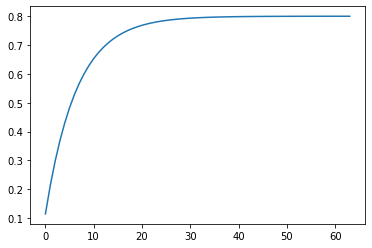

In [67]:
plt.plot(k)